# CEWA572 Practice Midterm

The general form of the advection-diffusion equation is given as:

$$     \frac{\partial c}{\partial t} + u \frac{\partial c}{\partial x} = \kappa \frac{\partial^{2} c}{\partial x^{2}}
$$

where $c$ is the tracer concentration, $u$ is the advective velocity, and $\kappa$ is the diffusion coefficient, or diffusivity.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

### 1.a. (5 pts)

Derive a set of Crank-Nicolson finite difference equations to solve the advection-diffusion equation. Note that the Crank-Nicolson scheme is an average of the forward-time centered-space and backward-time centered-space schemes such that an equation like:

$$     \frac{\partial c}{\partial t} = \kappa \frac{\partial^{2} c}{\partial x^{2}} $$

can be discretized using the "theta method" as:

$$     \frac{c^{k+1}_{i}-c^{k}_{i}}{\Delta t} = \kappa \left [ \theta \left \lbrace \frac{c^{k+1}_{i+1}+c^{k+1}_{i-1}-2c^{k+1}_{i}}{(\Delta x)^{2}} \right \rbrace + (1-\theta) \left \lbrace \frac{c^{k}_{i+1}+c^{k}_{i-1}-2c^{k}_{i}}{(\Delta x)^{2}} \right \rbrace \right ] $$

with $theta$ = 0.5.

**This equation above is just an example, please derive the Crank-Nicolson scheme for the advection-diffusion equation.**

The Crank-Nicolson scheme derived for the advection-diffusion equation can be written as:

$$     \frac{c^{k+1}_{i}-c^{k}_{i}}{\Delta t} + 
u \left [ \theta \left \lbrace \frac{c_{i+1}^{k+1} - c_{i-1}^{k+1}}{2\Delta x} \right \rbrace + (1-\theta) \left \lbrace \frac{c_{i+1}^{k} - c_{i-1}^{k}}{2\Delta x} \right \rbrace \right ]
= \kappa \left [ \theta \left \lbrace \frac{c^{k+1}_{i+1}+c^{k+1}_{i-1}-2c^{k+1}_{i}}{(\Delta x)^{2}} \right \rbrace + (1-\theta) \left \lbrace \frac{c^{k}_{i+1}+c^{k}_{i-1}-2c^{k}_{i}}{(\Delta x)^{2}} \right \rbrace \right ] $$

Defining $\theta$ as 0.5 and rearranging:

$$ c^{k+1}_{i}-c^{k}_{i} = 
\frac{\kappa\Delta t}{2\Delta x^{2}} \left [(c_{i+1}^{k} -2c_{i}^{k} + c_{i-1}^{k}) + 
(c_{i+1}^{k+1} - 2c_{i}^{k+1} + c_{i-1}^{k+1}) \right ] - \frac{u\Delta t}{4\Delta x} \left [(c_{i+1}^{k} - c_{i-1}^{k}) + (c_{i+1}^{k+1} - c_{i-1}^{k+1}) \right ]$$

now define $D = \kappa \frac{ \Delta t}{ \Delta x^2}$ and $S =u \frac{ \Delta t}{\Delta x} $:

$$c_j^{k+1}-c_j^k= \frac{D}{2}c^k_{j+1} - D c_j^k  +\frac{D}{2} c^k_{j-1}+\frac{D}{2} c^{k+1}_{j+1}  -D c_j^{k+1} +\frac{D}{2} c^{k+1}_{j-1}- \frac{S}{4}c^k_{j+1}+\frac{S}{4} c^k_{j-1}-\frac{S}{4} c^{k+1}_{j+1} +\frac{S}{4} c^{k+1}_{j-1}$$

This can be written as:

$$ (\frac{S}{2}-D) c^{k+1}_{j+1} +(2+2D)c^{k+1}_{j} -(\frac{S}{2}+D) c^{k+1}_{j-1} = (D-\frac{S}{2}) c^k_{j+1} + (D+\frac{S}{2}) c^{k}_{j-1} +(2-2D) c_j^k$$

Which is the equation in your lecture notes. 

This can be transformed into the matrix form of the equation (sorry for formatting issue):

$$A_{1}\vec{c}^{~k+1}=A_{2}\vec{c}^{~k}+B_{1}+B_{2}$$
\begin{bmatrix}
    2+2D & \frac{S}{2}-D & 0 & 0  & \dots  & 0 \\
   -(\frac{S}{2}+D)  & 2+2D    & \frac{S}{2}-D & 0 & \dots  & 0 \\
   0 & -(\frac{S}{2}+D) & 2+2D    & \frac{S}{2}-D & \dots  & 0 \\
    \vdots & \vdots  & \vdots & \vdots  & \ddots & \frac{S}{2}-D \\
    0 & 0  & 0 & 0 & -(\frac{S}{2}+D)  & 2+2D
\end{bmatrix} 
\begin{bmatrix}
    c_{j-1}^{k+1} \\
   c_{j}^{k+1}  \\
   c_{j+1}^{k+1} \\
    \vdots  \\
    c_{n}^{k+1} 
\end{bmatrix} =
\begin{bmatrix}
    2-2D & D-\frac{S}{2} & 0 & 0  & \dots  & 0 \\
   D+\frac{S}{2}  & 2-2D    & D-\frac{S}{2} & 0 & \dots  & 0 \\
   0 & D+\frac{S}{2} & 2-2D    & D-\frac{S}{2}& \dots  & 0 \\
    \vdots & \vdots  & \vdots & \vdots  & \ddots & D-\frac{S}{2} \\
    0 & 0  & 0 & 0 & D+\frac{S}{2}  & 2-2D
\end{bmatrix}
\begin{bmatrix}
    c_{j-1}^{k} \\
   c_{j}^{k}  \\
   c_{j+1}^{k} \\
    \vdots  \\
    c_{n}^{k} 
\end{bmatrix}
+
\begin{bmatrix}
    c_1(D+\frac{S}{2}) \\
    0\\
    \vdots \\
    0 \\
   c_0(D-\frac{S}{2})
\end{bmatrix}
+
\begin{bmatrix}
    c_1(D+\frac{S}{2}) \\
    0\\
    \vdots \\
    0 \\
   c_0(D-\frac{S}{2})
\end{bmatrix}

which is now consistent with the implementation in the advection_diffusion_1D_fd_schemes.ipynb notebook.

The problem setup for the following parts of the question is as follows.

**Consider a porous rod of length $L$ = 50 m, subject to the initial and boundary conditions:**

$$         c =c_{1} \quad t=0 \quad \text{ for all } \quad 0 \leq x \leq L \\
        c = c_{1} \quad t > 0 \quad \text{ for all } \quad x=0 \\
        c =c_{0} \quad t > 0 \quad \text{ for all } \quad x=L  $$
        
 **with $u$=5.0 m/day, $\kappa$=0.3333 m$^{2}$/day, $c_{0}$=0 mg/L and $c_{1}$=100 mg/L.**

### 1.b. (5 pts)

Use the analytical solution coded below to plot the distribution of the concentration $c$ versus $x$ for $t$ = 1 and 5 days. Note you will need to assign the variables.

In [13]:
# define the solution space
x0 = 0
xL = 50
L = xL-x0

# define the spatial discretization
n = 49
dx = L/(n+1)
x = np.arange(x0+dx,xL,dx)

# define the temporal discretization
m = 100
T = 5 # days
dt = T/m

# define initial and boundary conditions
c1 = 100 # mg/L
c0 = 0 # mg/L

# define parameters
u = 5 # m/day
kappa = 0.3333 # m2/day

# define Courant numbers
D = kappa*dt/(dx**2)
S = u*dt/dx
print('dx = ',dx)
print('dt = ',dt)
print('D = ',D)
print('S = ',S)

T1 = 1
C_ana_1 = c1/2 * (erfc((x-u*T1)/(2*np.sqrt(kappa*T1))) + np.exp(u*x/kappa) * erfc((x+u*T1)/(2*np.sqrt(kappa*T1))))
C_ana_5 = c1/2 * (erfc((x-u*T)/(2*np.sqrt(kappa*T))) + np.exp(u*x/kappa) * erfc((x+u*T)/(2*np.sqrt(kappa*T))))

dx =  1.0
dt =  0.05
D =  0.016665
S =  0.25


/var/folders/hl/l_pnglm51ys884gjlrjhkgqm0000gn/T/ipykernel_3995/1369930904.py:33: RuntimeWarning: overflow encountered in exp
  C_ana_1 = c1/2 * (erfc((x-u*T1)/(2*np.sqrt(kappa*T1))) + np.exp(u*x/kappa) * erfc((x+u*T1)/(2*np.sqrt(kappa*T1))))
/var/folders/hl/l_pnglm51ys884gjlrjhkgqm0000gn/T/ipykernel_3995/1369930904.py:33: RuntimeWarning: invalid value encountered in multiply
  C_ana_1 = c1/2 * (erfc((x-u*T1)/(2*np.sqrt(kappa*T1))) + np.exp(u*x/kappa) * erfc((x+u*T1)/(2*np.sqrt(kappa*T1))))
/var/folders/hl/l_pnglm51ys884gjlrjhkgqm0000gn/T/ipykernel_3995/1369930904.py:34: RuntimeWarning: overflow encountered in exp
  C_ana_5 = c1/2 * (erfc((x-u*T)/(2*np.sqrt(kappa*T))) + np.exp(u*x/kappa) * erfc((x+u*T)/(2*np.sqrt(kappa*T))))
/var/folders/hl/l_pnglm51ys884gjlrjhkgqm0000gn/T/ipykernel_3995/1369930904.py:34: RuntimeWarning: invalid value encountered in multiply
  C_ana_5 = c1/2 * (erfc((x-u*T)/(2*np.sqrt(kappa*T))) + np.exp(u*x/kappa) * erfc((x+u*T)/(2*np.sqrt(kappa*T))))


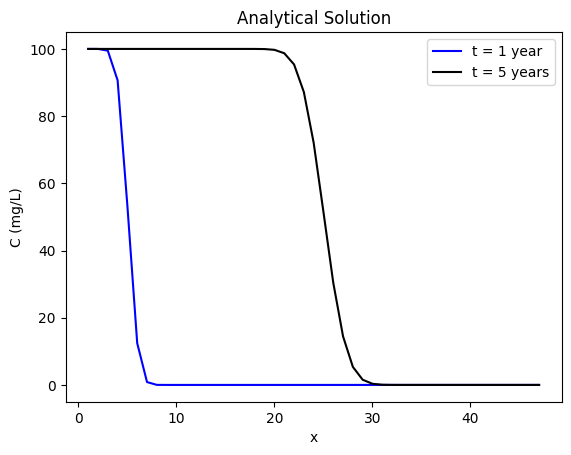

In [14]:
fig, ax = plt.subplots(1)
ax.plot(x, C_ana_1, 'b', lw=1.5, label='t = 1 year')
ax.plot(x, C_ana_5, 'k', lw=1.5, label='t = 5 years')
ax.set_xlabel('x')
ax.set_ylabel('C (mg/L)')
ax.set_title('Analytical Solution')
ax.legend()

### 1.c. (5 pts)

Using the Crank-Nicolson scheme derived in part (a), write the code below to obtain a numerical solution of tracer concentration $c$ variability versus $x$ at $t$ = 1 and 5 days. **Use a $\Delta x$ = 1.0 m and $\Delta t$ = 0.05 day. Plot your results and compare your solution to the analytical solution.**

In [23]:
# initialize the matrices
A1 = np.zeros((n,n))
A2 = np.zeros((n,n))

for i in range(n):
    if i == 0:
        A1[i, i] = 2+2*D
        A1[i, i+1] = (S/2)-D
        A2[i, i] = 2-2*D
        A2[i, i+1] = D-(S/2)
    elif i == n-1:
        A1[i, i-1] = -((S/2)+D)
        A1[i, i] = 2+(2*D)
        A2[i, i-1] = (S/2)+D
        A2[i, i] = 2-(2*D)
    else:
        A1[i, i] = 2+(2*D)
        A1[i, i-1] = -((S/2)+D)
        A1[i, i+1] = (S/2)-D
        A2[i, i] = 2-(2*D)
        A2[i, i-1] = ((S/2)+D)
        A2[i, i+1] = D-(S/2)
B1 = np.zeros((n, 1))
B2 = np.zeros((n, 1))

# apply Dirichlet BCs
B1[0] = -c1*(D+(S/2))
B1[n-1] = c0*((S/2)-D)
B2[0] = c1*(D+(S/2))
B2[n-1] = 0*((S/2)-D)

In [24]:
t0 = 0

C = np.empty((m, n))
C_xt = np.zeros_like(x)
C[0, :] = C_xt
t = np.zeros((m))
t[0] = t0

IA1 = np.linalg.inv(A1)
for i in range(m-1):
    tempC = np.matmul(A2, C_xt[:, np.newaxis]) + B2 - B1
    C_n = np.matmul(IA1, tempC)
    C[i+1, :] = C_n.flatten()
    C_xt = C_n.flatten()
    t[i+1] = t[i] + dt

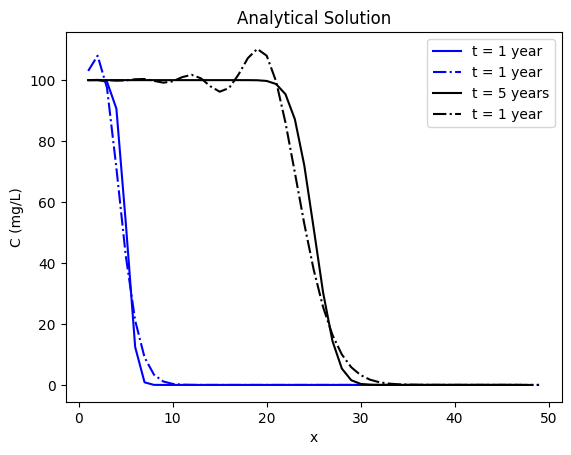

In [41]:
fig, ax = plt.subplots(1)
ax.plot(x, C_ana_1, 'b', lw=1.5, label='t = 1 year')
ax.plot(x, C[20,:], 'b-.', lw=1.5, label='t = 1 year')
ax.plot(x, C_ana_5, 'k', lw=1.5, label='t = 5 years')
ax.plot(x, C[-1,:], 'k-.', lw=1.5, label='t = 1 year')
ax.set_xlabel('x')
ax.set_ylabel('C (mg/L)')
ax.set_title('Analytical Solution')
ax.legend()

***

One possible finite difference approximation of the advective term

$$ u\frac{\partial c}{\partial x}$$

is based on using the values of concentration at a spatial node (grid point) and the node directly upgradient, or:

$$ \frac{\partial c}{\partial x} = \frac{c_{i} - c_{i-1}}{\Delta x}$$

### 1.d. (20 points)

Derive the finite difference approximation for the advection-diffusion equation using this upgradient form of the advective term. Use the Crank-Nicolson scheme for the diffusion stepping scheme.

$$ \frac{\partial c}{\partial x} = \frac{c_i^k-c_{i-1}^k}{\Delta x}$$
$$\frac{c_j^{k+1}-c_j^k}{\Delta t} + u \frac{c_j^k-c_{j-1}^k}{\Delta x} = \theta \left[\kappa \left( \frac{c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k}}{\Delta x^2}\right) \right]+\left(1-\theta\right) \left[ \kappa \left( \frac{c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1}}{\Delta x^2}\right)\right]$$

Again define $\theta$ = 0.5 and do some rearranging:

$$c_j^{k+1}-c_j^k + u\frac{\Delta t}{\Delta x} (c_j^k-c_{j-1}^k) = \kappa \frac{\Delta t}{2\Delta x^2}  \left( c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k}+ c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1} \right)$$

now define $D = \kappa \frac{ \Delta t}{ \Delta x^2}$ and $S =u \frac{ \Delta t}{\Delta x} $:

$$c_j^{k+1}-c_j^k + S (c_j^k-c_{j-1}^k) = \frac{D}{2}  \left( c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k}+ c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1} \right)$$

After rearranging and simplifying, this can also be written as:
$$(1+D)c_j^{k+1}-\frac{D}{2} c_{j+1}^{k+1}-\frac{D}{2} c_{j-1}^{k+1} = (1-S-D)c^k_j +(S+\frac{D}{2})c^k_{j-i}+\frac{D}{2}c^k_{j+1}$$

The matrix form of the equation is:

$$A_{1}\vec{c}^{~k+1}=A_{2}\vec{c}^{~k}+B$$
\begin{bmatrix}
    1+D & -\frac{D}{2} & 0 & 0  & \dots  & 0 \\
   -\frac{D}{2}  & 1+D    & -\frac{D}{2} & 0 & \dots  & 0 \\
   0 & -\frac{D}{2} & 1+D    & -\frac{D}{2} & \dots  & 0 \\
    \vdots & \vdots  & \vdots & \vdots  & \ddots & -\frac{D}{2} \\
    0 & 0  & 0 & 0 & -\frac{D}{2}  & 1+D
\end{bmatrix}
\begin{bmatrix}
    c_{j-1}^{k+1} \\
   c_{j}^{k+1}  \\
   c_{j+1}^{k+1} \\
    \vdots  \\
    c_{n}^{k+1} 
\end{bmatrix}=
\]
\[
\begin{bmatrix}
    1-S-D & \frac{D}{2}  & 0 & 0  & \dots  & 0 \\
   \frac{D}{2} & 1-S-D    & \frac{D}{2}  & 0 & \dots  & 0 \\
   0 & \frac{D}{2} & 1-S-D   & \frac{D}{2} & \dots  & 0 \\
    \vdots & \vdots  & \vdots & \vdots  & \ddots & \frac{D}{2}  \\
    0 & 0  & 0 & 0 & \frac{D}{2}   & 1-S-D
\end{bmatrix}
\begin{bmatrix}
    c_{j-1}^{k} \\
   c_{j}^{k}  \\
   c_{j+1}^{k} \\
    \vdots  \\
    c_{n}^{k} 
\end{bmatrix}
+
\begin{bmatrix}
    c_1(S+\frac{D}{2}) \\
    0\\
    \vdots \\
    0 \\
   c_0(\frac{D}{2})
\end{bmatrix}

### 1.e. (20 points)

Modify your original Crank-Nicolson program to use the new approximation to solve the problem from part (c). Plot the concentration profiles at days 1 and 5 using the new program and the original program. Note that the new curve exhibits more diffusion than the curves you produced originally and that the oscillations go away.

In [38]:
# initialize the matrices
A1 = np.zeros((n,n))
A2 = np.zeros((n,n))

for i in range(n):
    if i == 0:
        A1[i, i] = 1+D
        A1[i, i+1] = -D/2
        A2[i, i] = 1-S-D
        A2[i, i+1] = D/2
    elif i == n-1:
        A1[i, i-1] = -D/2
        A1[i, i] = 1+D
        A2[i, i-1] = S+D/2
        A2[i, i] = 1-S-D
    else:
        A1[i, i] = 1+D
        A1[i, i-1] = -D/2
        A1[i, i+1] = -D/2
        A2[i, i] = 1-S-D
        A2[i, i-1] = S+D/2
        A2[i, i+1] = D/2
B1 = np.zeros((n, 1))

# apply Dirichlet BCs
B1[0] = c1*(S+(D/2))
B1[n-1] = c0*(D/2)

In [39]:
t0 = 0

C_upgrad = np.empty((m, n))
C_xt = np.zeros_like(x)
C_upgrad[0, :] = C_xt
t = np.zeros((m))
t[0] = t0

IA1 = np.linalg.inv(A1)
for i in range(m-1):
    tempC = np.matmul(A2, C_xt[:, np.newaxis]) + B1
    C_n = np.matmul(IA1, tempC)
    C_upgrad[i+1, :] = C_n.flatten()
    C_xt = C_n.flatten()
    t[i+1] = t[i] + dt

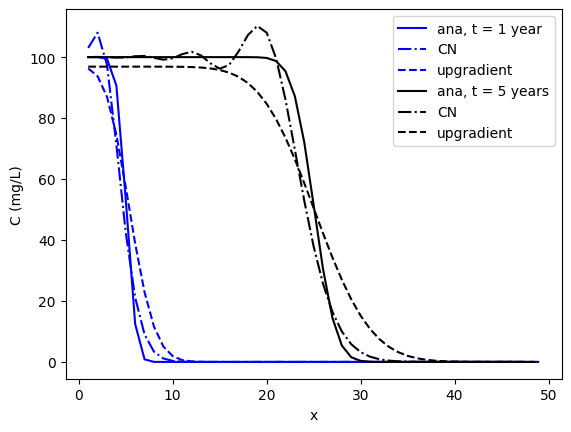

In [44]:
fig, ax = plt.subplots(1)
ax.plot(x, C_ana_1, 'b', lw=1.5, label='ana, t = 1 year')
ax.plot(x, C[20,:], 'b-.', lw=1.5, label='CN')
ax.plot(x, C_upgrad[20,:], 'b--', lw=1.5, label='upgradient')
ax.plot(x, C_ana_5, 'k', lw=1.5, label='ana, t = 5 years')
ax.plot(x, C[-1,:], 'k-.', lw=1.5, label='CN')
ax.plot(x, C_upgrad[-1,:], 'k--', lw=1.5, label='upgradient')
ax.set_xlabel('x')
ax.set_ylabel('C (mg/L)')
ax.legend()

### 1.f (45 points) 

Why does this new numerical approximation damp oscillations? To determine why and under what conditions this occurs, define the following:

- $\kappa$ is the value used for the diffusion coefficient when using the central-in-space approximation of the advective term
- $\kappa^{*}$ is the value used for the diffusion coefficient when using the up-gradient approximation of the advective term

The relationship between the two is $\kappa = \kappa^{*} - Z$, where $Z$ is another type of diffusion coefficient. 

Come up with a general formula that can be used to determine the value of $Z$. This formula should be a function of known quantities. **Hint:** Check the course notes on the concepts of numerical diffusion (Chapter 6). 

Now calculate $Z$ using the new general formula, and adjust the value of $\kappa$ in your new program accordingly. Show that the results match the original solutions as shown in part (c) and that the oscillations reappear.

Just a quick blurb about how this is done. The goal is to identify a purely numerical additional term that modifies our diffusion term $\frac{\partial^{2}c}{\partial x^{2}}$, in addition to $\kappa$. We use Taylor Series expansion to write out each term in our finite difference approximations and plug them into the Crank-Nicolson or upgradient formulations that we derived above. Follow your notes from lecture - we did this together!

First, write out the Taylor series expansion for general terms in finite difference approximations:

$$c^{k+1}_{j}=c^{k}_{j} + \frac{\Delta t}{1!} \frac{\partial c}{\partial t} +\frac{(\Delta t)^2}{2!} \frac{\partial ^2 c}{\partial t^2}+\frac{(\Delta t)^3}{3!} \frac{\partial ^3 c}{\partial t^3} + \frac{(\Delta t)^4}{4!} \frac{\partial ^4 c}{\partial t^4} ...$$

$$c^{k}_{j+1}=c^{k}_{j} + \frac{\Delta x}{1!} \frac{\partial c}{\partial x} +\frac{(\Delta x)^2}{2!} \frac{\partial ^2 c}{\partial x^2}+\frac{(\Delta x)^3}{3!} \frac{\partial ^3 c}{\partial x^3}+ \frac{(\Delta x)^4}{4!} \frac{\partial ^4 c}{\partial x^4}...$$

$$c^{k}_{j-1}=c^{k}_{j} - \frac{\Delta x}{1!} \frac{\partial c}{\partial x} +\frac{(\Delta x)^2}{2!} \frac{\partial ^2 c}{\partial x^2} - \frac{(\Delta x)^3}{3!} \frac{\partial ^3 c}{\partial x^3}+ \frac{(\Delta x)^4}{4!} \frac{\partial ^4 c}{\partial x^4} - ...$$

$$c^{k+1}_{j+1}=c^{k+1}_{j} + \frac{\Delta x}{1!} \frac{\partial c}{\partial x} +\frac{(\Delta x)^2}{2!} \frac{\partial ^2 c}{\partial x^2}+\frac{(\Delta x)^3}{3!} \frac{\partial ^3 c}{\partial x^3}+ \frac{(\Delta x)^4}{4!} \frac{\partial ^4 c}{\partial x^4}...$$

$$c^{k+1}_{j-1}=c^{k+1}_{j} - \frac{\Delta x}{1!} \frac{\partial c}{\partial x} +\frac{(\Delta x)^2}{2!} \frac{\partial ^2 c}{\partial x^2} - \frac{(\Delta x)^3}{3!} \frac{\partial ^3 c}{\partial x^3}+ \frac{(\Delta x)^4}{4!} \frac{\partial ^4 c}{\partial x^4} - ...$$

Plugging this into the Crank-Nicholson formulation:
$$\frac{c_j^{k+1}-c_j^k}{\Delta t}=\theta \left[\kappa \left( \frac{c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k}}{\Delta x^2}\right)-u \left(\frac{c_{j+1}^{k}-c_{j-1}^{k}}{2\Delta x}\right) \right]+\left(1-\theta\right) \left[ \kappa \left( \frac{c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1}}{\Delta x^2}\right)-u \left(\frac{c_{j+1}^{k+1}-c_{j-1}^{k+1}}{2\Delta x}\right)\right]$$
with $\theta=0.5$.

$$\frac{c_j^{k+1}-c_j^k}{\Delta t}+\frac{u}{4\Delta x} \left[(c_{j+1}^{k}-c_{j-1}^{k})+(c_{j+1}^{k+1}-c_{j-1}^{k+1})\right] - \frac{\kappa }{2 \Delta x^2} \left[(c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k})+(c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1}) \right] =
\left[ \frac{\partial c}{\partial t} +\frac{\Delta t}{2!} \frac{\partial ^2 c}{\partial t^2}+\frac{(\Delta t)^2}{3!} \frac{\partial ^3 c}{\partial t^3} +\mathcal{O}((\Delta t) ^3)\right] +
\frac{u}{2} \left[ \left( \frac{\partial c}{\partial x} +\frac{(\Delta x)^2}{3!} \frac{\partial ^3 c}{\partial x^3} +\mathcal{O}((\Delta x) ^4)\right) + \left(  \frac{\partial c}{\partial x} +\frac{(\Delta x)^2}{3!} \frac{\partial ^3 c}{\partial x^3}
+\mathcal{O}((\Delta x) ^4)\right) \right] 
- \frac{\kappa}{2} \left[ \left(\frac{\partial ^2 c}{\partial x^2}+ \frac{2(\Delta x)^2}{4!} \frac{\partial ^4 c}{\partial x^4} 
+\mathcal{O}((\Delta x) ^4)\right) + \left( \frac{\partial ^2 c}{\partial x^2}+ \frac{2(\Delta x)^2}{4!} \frac{\partial ^4 c}{\partial x^4} 
+\mathcal{O}((\Delta x) ^4) \right) \right] $$

$$\frac{c_j^{k+1}-c_j^k}{\Delta t}+\frac{u}{4\Delta x} \left[(c_{j+1}^{k}-c_{j-1}^{k})+(c_{j+1}^{k+1}-c_{j-1}^{k+1})\right] - \frac{\kappa }{2 \Delta x^2} \left[(c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k})+(c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1}) \right] =$$
$$\left [ \frac{\partial c}{\partial t} +\frac{\Delta t}{2!} \frac{\partial ^2 c}{\partial t^2}+\frac{(\Delta t)^2}{3!} \frac{\partial ^3 c}{\partial t^3} +\mathcal{O}((\Delta t) ^3)\right]  +  
u \left[  \frac{\partial c}{\partial x} +\frac{(\Delta x)^2}{3!} \frac{\partial ^3 c}{\partial x^3}
+\mathcal{O}((\Delta x) ^4) \right]
-\kappa \left[ \frac{\partial ^2 c}{\partial x^2}+ \frac{2(\Delta x)^2}{4!} \frac{\partial ^4 c}{\partial x^4} 
+\mathcal{O}((\Delta x) ^4) \right] $$

Now we can simplify the order:
$$\frac{c_j^{k+1}-c_j^k}{\Delta t}+\frac{u}{4\Delta x} \left[(c_{j+1}^{k}-c_{j-1}^{k})+(c_{j+1}^{k+1}-c_{j-1}^{k+1})\right] - \frac{\kappa }{2 \Delta x^2} \left[(c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k})+(c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1}) \right] =
 \frac{\partial c}{\partial t} + u\frac{\partial c}{\partial x}  
 -\kappa \frac{\partial ^2 c}{\partial x^2} 
+ \frac{\Delta t}{2!} \frac{\partial ^2 c}{\partial t^2}
+\frac{(\Delta t)^2}{3!} \frac{\partial ^3 c}{\partial t^3}
+u\frac{(\Delta x)^2}{3!} \frac{\partial ^3 c}{\partial x^3}
+\mathcal{O}((\Delta t) ^3) 
+\mathcal{O}((\Delta x) ^3) $$

As in our lecture notes at this stage, we'd like to continue to expand the terms as much as we can. In particular, we want to find an expression for $\frac{\partial ^2 c}{\partial t^2}$. So, we can differentiate the original advection-diffusion equation with respect to time:

$$\frac{\partial^2 c}{\partial t^2} +u \frac{\partial }{\partial x} \left( \frac{\partial c}{\partial t}\right) = \kappa \frac{\partial  ^3 c}{ \partial t \partial x^2}$$

Sub for $\frac{\partial c}{\partial t}$:

$$\frac{\partial^2 c}{\partial t^2} +u \frac{\partial }{\partial x} \left( 
\kappa \frac{\partial  ^2 c}{\partial x^2} -
u \frac{\partial c}{\partial x} \right) = \kappa \frac{\partial  ^3 c}{ \partial t \partial x^2}$$

$$\frac{\partial^2 c}{\partial t^2} 
 = u^2 \frac{\partial^2 c}{\partial x^2}- u \kappa \frac{\partial^3 c}{\partial x^3} + \kappa \frac{\partial  ^3 c}{ \partial t \partial x^2}  $$

Now we have an expression for $\frac{\partial ^2 c}{\partial t^2}$ that we can put into our CN finite difference approximation above:

 $$\frac{c_j^{k+1}-c_j^k}{\Delta t}+\frac{u}{4\Delta x} \left[(c_{j+1}^{k}-c_{j-1}^{k})+(c_{j+1}^{k+1}-c_{j-1}^{k+1})\right] - \frac{\kappa }{2 \Delta x^2} \left[(c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k})+(c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1}) \right] =
 \frac{\partial c}{\partial t} + u\frac{\partial c}{\partial x}  
 -\kappa \frac{\partial ^2 c}{\partial x^2} 
 + \frac{\Delta t}{2!} \left( u^2 \frac{\partial^2 c}{\partial x^2}- u \kappa \frac{\partial^3 c}{\partial x^3} + \kappa \frac{\partial  ^2 c}{ \partial t \partial x^2} \right)
+\frac{(\Delta t)^2}{3!} \frac{\partial ^3 c}{\partial t^3}
+u\frac{(\Delta x)^2}{3!} \frac{\partial ^3 c}{\partial x^3}
+\mathcal{O}((\Delta t) ^3) 
+\mathcal{O}((\Delta x) ^3) $$
 
Rearrange the RHS:

$$=  \frac{\partial c}{\partial t} + u\frac{\partial c}{\partial x}  
 -\kappa \frac{\partial ^2 c}{\partial x^2} 
 + \frac{\Delta t}{2!} u^2 \frac{\partial^2 c}{\partial x^2}+
 \left[
 -  \frac{\Delta t}{2!} u \kappa \frac{\partial^3 c}{\partial x^3} +  \frac{\Delta t}{2!} \kappa \frac{\partial  ^3 c}{ \partial t \partial x^2} 
+\frac{(\Delta t)^2}{3!} \frac{\partial ^3 c}{\partial t^3}
+u\frac{(\Delta x)^2}{3!} \frac{\partial ^3 c}{\partial x^3}
+\mathcal{O}((\Delta t) ^3) 
+\mathcal{O}((\Delta x) ^3) \right]$$

and simplify the higher order terms in $[-]$:

$$=  \frac{\partial c}{\partial t} + u\frac{\partial c}{\partial x}  
 -\kappa \frac{\partial ^2 c}{\partial x^2} 
 + \frac{\Delta t}{2!} u^2 \frac{\partial^2 c}{\partial x^2}
+\mathcal{O}((\Delta t) ^2) 
+\mathcal{O}((\Delta x) ^2) $$

$$\frac{c_j^{k+1}-c_j^k}{\Delta t}+\frac{u}{4\Delta x} \left[(c_{j+1}^{k}-c_{j-1}^{k})+(c_{j+1}^{k+1}-c_{j-1}^{k+1})\right] - \frac{\kappa }{2 \Delta x^2} \left[(c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k})+(c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1}) \right] =$$
$$=  \frac{\partial c}{\partial t} + u\frac{\partial c}{\partial x}  
 -\kappa \frac{\partial ^2 c}{\partial x^2} 
 + \frac{\Delta t}{2!} u^2 \frac{\partial^2 c}{\partial x^2}$$

Now:
$$=  \frac{\partial c}{\partial t} + u\frac{\partial c}{\partial x}  
 - \left( \kappa -  \frac{\Delta t}{2!} u^2\right) \frac{\partial^2 c}{\partial x^2}$$
 $$\kappa - \kappa' = \kappa - \frac{\Delta t}{2} u^2$$

where $\kappa'$ is the numerical diffusion. We will refer to the expression above as $\kappa$ for the Crank-Nicolson method to be consistent with the question text above. 

***
We can repeat this process for the upgradient Crank-Nicolson scheme that we developed. Skipping steps and jumping straight to the solution.

$$c_j^{k+1}-c_j^k + u\frac{\Delta t}{\Delta x} (c_j^k-c_{j-1}^k)- \kappa \frac{\Delta t}{2\Delta x^2}  \left( c_{j+1}^{k}-2c_{j}^{k}+c_{j-1}^{k}+ c_{j+1}^{k+1}-2c_{j}^{k+1}+c_{j-1}^{k+1} \right) = 
\frac{\partial c}{\partial t}+u \frac{\partial c}{\partial x}  - \left( \kappa 
-  \left( u^2 \frac{\Delta t}{2!} +u \frac{\Delta x}{2!} \right)\right) \frac{\partial ^2 c}{\partial x^2}$$

and 

$$\kappa -\kappa' = \kappa - \left( u^2 \frac{\Delta t}{2!} +u \frac{\Delta x}{2!} \right)$$

We will refer to the expression above as $\kappa*$ for the upgradient CN scheme to be consistent with the question text above.

The difference between the diffusion expressions for the two methods is $Z$, as defined in the question with $\kappa = \kappa^{*} - Z$. This is going to be a little confusing with the original $\kappa$, bear with:

 $$Z = \kappa^{*} - \kappa = \left( \kappa-\left( u^2 \frac{\Delta t}{2!} + u \frac{\Delta x}{2!}\right) \right)- \left(\kappa -\left( u^2 \frac{\Delta t}{2}\right)\right)$$
 $$Z = u \frac{\Delta x}{2}$$


***

Now, we modify $\kappa$ in the upgradient Crank-Nicolson scheme to take into account the numerical diffusion and rerun the program.

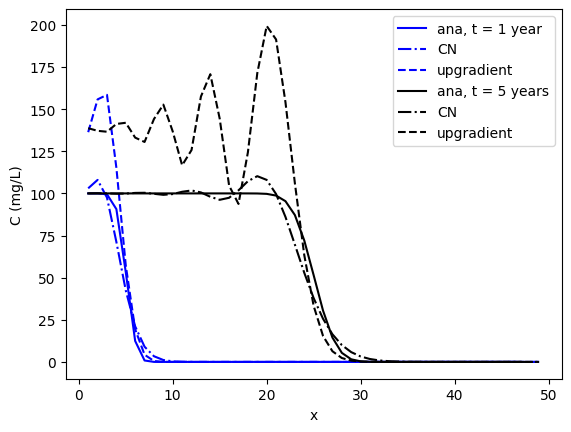

In [46]:
kappa_new = kappa - u*dx/2 # m2/day

# redefine Courant numbers
D = kappa_new*dt/(dx**2)
S = u*dt/dx

# initialize the matrices
A1 = np.zeros((n,n))
A2 = np.zeros((n,n))

for i in range(n):
    if i == 0:
        A1[i, i] = 1+D
        A1[i, i+1] = -D/2
        A2[i, i] = 1-S-D
        A2[i, i+1] = D/2
    elif i == n-1:
        A1[i, i-1] = -D/2
        A1[i, i] = 1+D
        A2[i, i-1] = S+D/2
        A2[i, i] = 1-S-D
    else:
        A1[i, i] = 1+D
        A1[i, i-1] = -D/2
        A1[i, i+1] = -D/2
        A2[i, i] = 1-S-D
        A2[i, i-1] = S+D/2
        A2[i, i+1] = D/2
B1 = np.zeros((n, 1))

# apply Dirichlet BCs
B1[0] = c1*(S+(D/2))
B1[n-1] = c0*(D/2)

t0 = 0

C_upgrad = np.empty((m, n))
C_xt = np.zeros_like(x)
C_upgrad[0, :] = C_xt
t = np.zeros((m))
t[0] = t0

IA1 = np.linalg.inv(A1)
for i in range(m-1):
    tempC = np.matmul(A2, C_xt[:, np.newaxis]) + B1
    C_n = np.matmul(IA1, tempC)
    C_upgrad[i+1, :] = C_n.flatten()
    C_xt = C_n.flatten()
    t[i+1] = t[i] + dt
    
fig, ax = plt.subplots(1)
ax.plot(x, C_ana_1, 'b', lw=1.5, label='ana, t = 1 year')
ax.plot(x, C[20,:], 'b-.', lw=1.5, label='CN')
ax.plot(x, C_upgrad[20,:], 'b--', lw=1.5, label='upgradient')
ax.plot(x, C_ana_5, 'k', lw=1.5, label='ana, t = 5 years')
ax.plot(x, C[-1,:], 'k-.', lw=1.5, label='CN')
ax.plot(x, C_upgrad[-1,:], 'k--', lw=1.5, label='upgradient')
ax.set_xlabel('x')
ax.set_ylabel('C (mg/L)')
ax.legend()